In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
print('导入完成')

导入完成


In [169]:
%matplotlib inline
# 魔法函数
import matplotlib.style as psl
print(plt.style.available)
psl.use('seaborn-colorblind')

print('finished!')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
finished!


Text(0.5, 1.0, '测试')

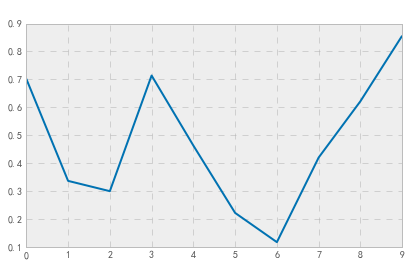

In [189]:
plt.plot(np.arange(10), np.random.rand(10))
plt.title('测试')

#### 1、 收入多少 ——每月净收入模型构建
* 净收入 = 月薪 - 五险一金 + 基金收益 - 个人所得税
* 假设 月薪1w，基金收益100~500。
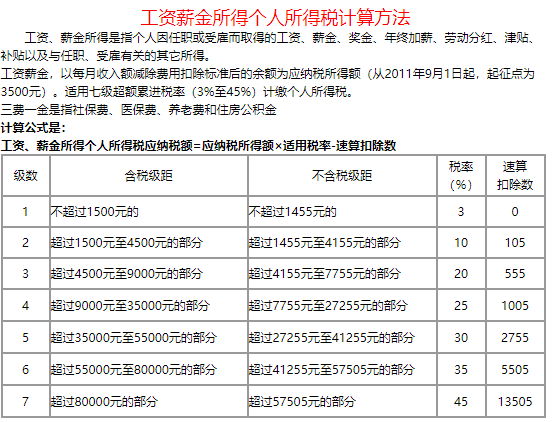

In [190]:
# 构建税费计算函数
import random
salary_sum = 10000 + random.randint(100, 500)
tax = 0
def tax(salary_sum):
    if salary_sum <= 3500:
        return 0
    elif salary_sum <= (3500 + 1500):
        return (salary_sum - 3500) * 0.03
    elif salary_sum <= (3500 + 1500 + 3000):
        return 1500 * 0.03 + (salary_sum - 1500 - 3500) * 0.1
    elif salary_sum <= (3500 + 1500 + 3000 + 4500):
        return 1500 * 0.03 + 3000 * 0.1 + (salary_sum - 1500 - 3000 - 3500) * 0.2
    elif salary_sum <= (3500 + 1500 + 3000 + 4500 + 26000):
        return 1500 * 0.03 + 3000 * 0.1 + 4500 * 0.2 (salary_sum - 1500 - 3000 - 4500 - 3500) * 0.25
    elif salary_sum <= (3500 + 1500 + 3000 + 4500 + 26000 + 20000):
        return 1500 * 0.03 + 3000 * 0.1 + 4500 * 0.2 + 26000 * 0.25 + (salary_sum - 1500 - 3000 - 4500 - 3500 - 26000) * 0.3
    elif salary_sum <= (3500 + 1500 + 3000 + 4500 + 26000 + 20000 + 25000):
        return 1500 * 0.03 + 3000 * 0.1 + 4500 * 0.2 + 26000 * 0.25 + 20000 * 0.3 + (salary_sum - 1500 - 3000 - 4500 - 3500 - 26000 - 20000) * 0.3
    else:
        return 1500 * 0.03 + 3000 * 0.1 + 4500 * 0.2 + 26000 * 0.25 + 20000 * 0.3 + 25000 * 0.35 + (salary_sum - 1500 - 3000 - 4500 - 3500 - 26000 - 20000 - 25000) * 0.45 * 0.3
text = 10000
print('函数构建完成， 当月薪为 %.1f元时，需要缴纳的税费 %0.2f元' %(text,tax(text)))
tax(salary_sum)

函数构建完成， 当月薪为 10000.0元时，需要缴纳的税费 745.00元


796.4000000000001

In [172]:
# 构建五险一金计算函数
def insurance(salary):
    if salary <= 21396:
        return salary * 0.175
    else:
        return 3744.58
    
text = 10000
print('函数构建完成， 当月薪为 %.1f元时，需要缴纳的税费 %0.2f元' %(text,insurance(text)))

函数构建完成， 当月薪为 10000.0元时，需要缴纳的税费 1750.00元


函数构建完成,当基金平均收益为100元时， 随机数为：
0     19.961538
1    100.838791
2      3.337286
3    172.480115
4     55.044369
5     33.294047
6    -12.850821
7    263.114151
8     89.383786
9     55.072386
dtype: float64


(array([ 1.,  3.,  1.,  1.,  2.,  1.,  0.,  4.,  4.,  3.,  4.,  7.,  9.,
         7.,  6., 11.,  8.,  5.,  7.,  8.,  5.,  5.,  2.,  2.,  3.,  3.,
         5.,  1.,  1.,  1.]),
 array([-74.38138071, -58.54541295, -42.70944518, -26.87347742,
        -11.03750965,   4.79845812,  20.63442588,  36.47039365,
         52.30636142,  68.14232918,  83.97829695,  99.81426471,
        115.65023248, 131.48620025, 147.32216801, 163.15813578,
        178.99410355, 194.83007131, 210.66603908, 226.50200684,
        242.33797461, 258.17394238, 274.00991014, 289.84587791,
        305.68184568, 321.51781344, 337.35378121, 353.18974897,
        369.02571674, 384.86168451, 400.69765227]),
 <a list of 30 Patch objects>)

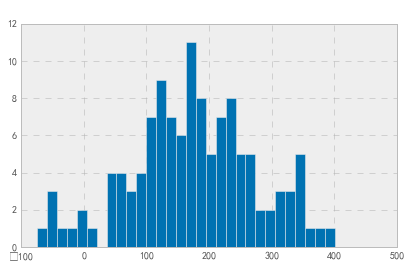

In [205]:
# 构建基金收益随机函数 b_avg=100 scale为标准差
def bonus(b_avg):
    """
    正态分布
    """
    return pd.Series(np.random.normal(loc=b_avg, scale=100, size=120))
print('函数构建完成,当基金平均收益为100元时， 随机数为：')
print(bonus(100)[:10])
# psl.use('ggplot')
plt.title('奖金随机函数 - 数据分布直方图')
plt.hist(bonus(200), bins = 30)
# plt.grid()

Text(0.5, 1.0, '月收入情况-前12个月')

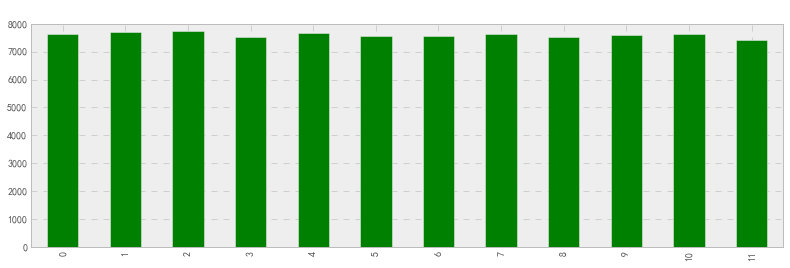

In [206]:
# 构建月净收入函数
# 净收入 = 月薪 - 五险一金 + 基金收益 - 个人所得税
def final_income(s, b_avg):
    df_i = pd.DataFrame({
        '月薪': [s for i in range(120)],
        '五险一金': [insurance(s) for i in range(120)],
        '基金收益': bonus(b_avg)
    })
    df_i['计税部分'] = df_i['月薪'] + df_i['基金收益']
    df_i['个人所得税'] = df_i['计税部分'].apply(lambda x: tax(x))
    df_i['月净收入'] = df_i['月薪'] + df_i['基金收益'] - df_i['五险一金'] - df_i['个人所得税'] 
    return df_i
result = final_income(10000, 50)
result.head(10)
result['月净收入'].iloc[:12].plot(kind='bar', figsize=(12, 4), color='Green')
plt.title('月收入情况-前12个月')

#### 1、花费多少 ——每月开支模型构建
* 基本生活支出 50/day 设定为1500元和2000元为限，均匀分布
* 购物支出 1000为均值，500为标准差的正态分布
* 娱乐支出 以400元和1200元为限，均匀分布
* 学习支出 100元到500元均匀分布
* 租房支出 设定为2000元和2200元为限，均匀分布
* 其他支出 设定为500位均值，40元位标准差的正态分布

总支出 = 基本生活支出 + 购物支出 + 娱乐支出 + 学习支出 + 租房支付 + 其他支出

finished


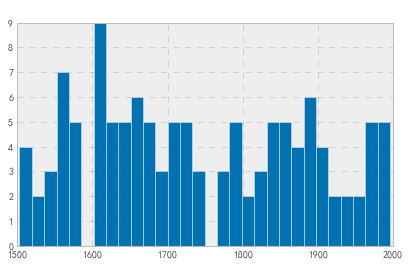

In [181]:
# 基本生活支出 50/day 设定为1500元和2000元为限，均匀分布
general_expense = pd.Series(np.random.randint(1500, 2000, size = 120))
plt.title('基本生活支出')
plt.hist(general_expense, bins = 30)
print('finished')

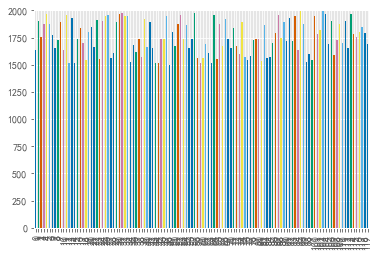

In [125]:
general_expense.plot(kind='bar', ylim=[0,2000])

finished


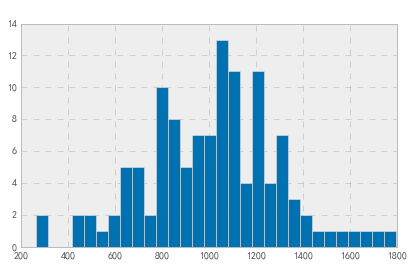

In [214]:
# 购物支出 1000为均值，300为标准差的正态分布
shopping = pd.Series(np.random.normal(loc=1000, scale=300, size=120))
# psl.use('seaborn-colorblind')
plt.title('购物支出')
plt.hist(shopping, bins=30)

print('finished')
# print(plt.style.available)

finished


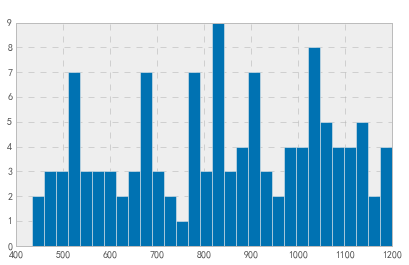

In [217]:
# 娱乐支出 以400元和1200元为限，均匀分布
happy = pd.Series(np.random.randint(400, 1200, size = 120))
plt.title('娱乐支出')
plt.hist(happy, bins = 30)
print('finished')

finished


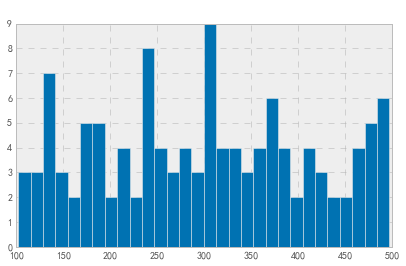

In [219]:
# 学习支出 100元到500元均匀分布
study = pd.Series(np.random.randint(100, 500, size = 120))
plt.title('学习支出')
plt.hist(study, bins = 30)
print('finished')

finished


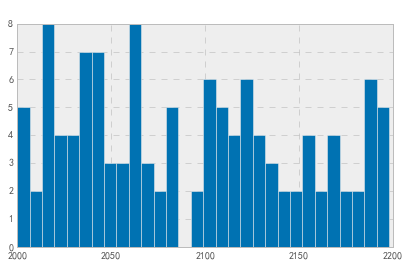

In [221]:
# 租房支出 设定为2000元和2200元为限，均匀分布
house = pd.Series(np.random.randint(2000, 2200, size = 120))
plt.title('租房支出')
plt.hist(house, bins = 30)
print('finished')

finished


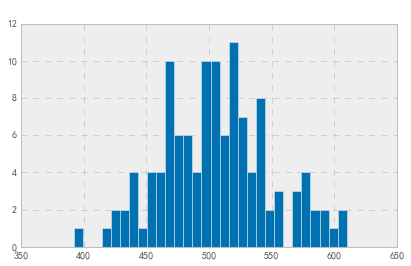

In [224]:
# 其他支出 设定为500位均值，40元位标准差的正态分布
other = pd.Series(np.random.normal(loc=500, scale=40, size=120))
plt.title('其他支出')
plt.hist(other, bins = 30)
print('finished')

,基本生活支出,购物支出,娱乐支出,学习支出,租房支出,其他支出,月总支出
0,1628,1339.418035,959,155,2173,473.321508,6727.739544
1,1845,1425.348059,458,132,2041,452.397882,6353.745941
2,1874,1121.799675,669,234,2134,443.811076,6476.610751
3,1870,1514.310276,948,239,2079,517.093045,7167.403321
4,1907,437.989665,615,173,2048,508.256344,5689.246009


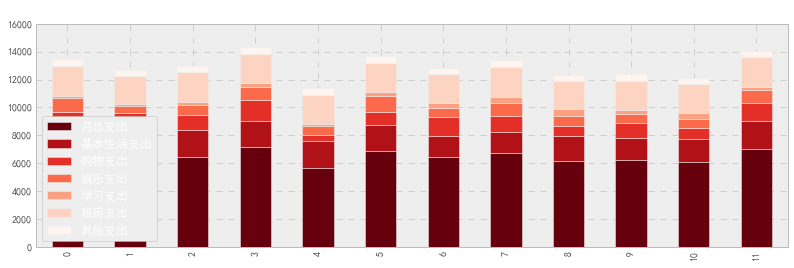

In [230]:
# 总支出 = 基本生活支出 + 购物支出 + 娱乐支出 + 学习支出 + 租房支付 + 其他支出
def final_expense():
    df_i = pd.DataFrame({
        '基本生活支出': np.random.randint(1500, 2000, size = 120),
        '购物支出': np.random.normal(loc=1000, scale=300, size=120),
        '娱乐支出': np.random.randint(400, 1200, size = 120),
        '学习支出': np.random.randint(100, 500, size = 120),
        '租房支出': np.random.randint(2000, 2200, size = 120),
        '其他支出': np.random.normal(loc=500, scale=40, size=120)
        
    })
    df_i['月总支出'] =  df_i['基本生活支出'] +  df_i['购物支出'] +  df_i['娱乐支出'] +  df_i['学习支出'] +  df_i['租房支出'] +  df_i['其他支出'] 
    return df_i

result = final_expense()

result[['月总支出', '基本生活支出', '购物支出', '娱乐支出', '学习支出', '租房支出', '其他支出']].iloc[:12].plot(kind = 'bar',
                                                                                 figsize = (12, 4),
                                                                                 stacked = True,
                                                                                 colormap = 'Reds_r')
plt.title('月总支出情况 - 前12个月')
result.head()

### 3、“是否吃土？”——使用花呗的情况模拟
整理几个约束条件
* 每月先还欠款，再消费
* 所有的支出除还款外，都可以使用花呗透支
* 当这月的收入小于等于需要还款的金额，就代表你要吃土了
* 花呗信用的总额度为1.5w

#### 所以如何算破（吃）产（土）呢？
当月还需借贷花呗金额 = 月余金额 + 月收入 - 月支出 - 本月需还花呗  > 15000时

第一回合，不使用分期

In [243]:
# 创建120个月的：①月收入， ②月支出， ③月初余额， ④本月需还花呗，用0元来做填充

income = final_income(10000, 50)['月净收入'].tolist()
expense = final_expense()['月总支出'].tolist()
saving = [0 for i in range(120)]
debt = [0 for i in range(120)]

print('前6个月的月收入，月支出，月初余额（未计算），本月需还花呗（未计算）数据分别是： \n')
print(income[:6])
print(expense[:6])
print(saving[:6])
print(debt[:6])

前6个月的月收入，月支出，月初余额（未计算），本月需还花呗（未计算）数据分别是： 

[7463.632878453002, 7457.9800957599755, 7530.69657148527, 7623.101537622601, 7656.4088953741275, 7491.491313580584]
[6879.169709865558, 6711.56236370067, 6953.174665641258, 6966.834890639716, 5709.562978967486, 6773.3162549063545]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


In [245]:
# 算法推导 ——> 第二个月推导
if income[0] >= expense[0]:
    """
    第一个月收入大于等于支出时：
    第二个月月初余额 = 第一个月收入 - 第一个月支出
    第二个月需还花呗 = 0
    """
    saving[1] = income[0] - expense[0]
    debt[1] = 0 
else:
    """
    第一个月收入小于等于支出时：
    第二个月月初余额 = 0
    第二个月需还花呗 = 第一个月支出 - 第一个月收入
    """
    saving[1] = 0
    debt[1] = expense[0] - income[0]
    
print(income[:2])
print(expense[:2])
print(saving[:2])
print(debt[:2])

[7463.632878453002, 7457.9800957599755]
[6879.169709865558, 6711.56236370067]
[0, 584.4631685874447]
[0, 0]


In [308]:
# 构建函数模拟

income = final_income(10000, 50)['月净收入'].tolist()
expense = final_expense()['月总支出'].tolist()
saving = [0 for i in range(120)]
debt = [0 for i in range(120)]

def case_a():
    month = []
    data = []
    # 创建2个空列表，用于存放月和每月的数据

    # 当月还需借贷花呗金额 = 月余金额 + 月收入 - 月支出 - 本月需还花呗 > 15000时
    for i in range(120):
        money = saving[i] + income[i] - expense[i] - debt[i] # 当月还需借贷花呗金额 = 月余金额 + 月收入 - 月支出 - 本月需还花呗 > 15000时
        if i == 119:
                print('够你花的了')
                break
        if money > 15000:
            # 当月 还需 借贷花呗金额大于15000 ——> 破产了
            print('第%i个月花呗也救不了我，我要破产了！\n ----------'% (i+1))

            break
        else:
            # 当月还需借贷花呗金额小于15000 ——> 继续浪
            if money >= 0:
                saving[i+1] = saving[i] + income[i] - expense[i] - debt[i]
                debt[i+1] = 0
            else:
                saving[i+1] = 0
                debt[i+1] = -(saving[i] + income[i] - expense[i] - debt[i])

        month.append(i+1)
        data.append([income[i], expense[i], debt[i], saving[i+1], debt[i+1]])
    result_a = pd.DataFrame(data, columns=['月收入', '月支出', '本月需还花呗', '本月余额', '欠债'], index=month)
    result_a.index.name = '月份'
    return result_a

print('不分期情况下的模型构建完成')

不分期情况下的模型构建完成


In [336]:
income = final_income(10000, 50)['月净收入'].tolist()
expense = final_expense()['月总支出'].tolist()
saving = [0 for i in range(120)]
debt = [0 for i in range(120)]
case_a()

第13个月花呗也救不了我，我要破产了！
 ----------


,月收入,月支出,本月需还花呗,本月余额,欠债
月份,,,,,
1,7520.455352,6397.598938,0,1122.856415,0
2,7463.862468,6503.041028,0,2083.677854,0
3,7483.770462,5993.529128,0,3573.919188,0
4,7580.852400,6585.997745,0,4568.773843,0
5,7607.597327,6420.402313,0,5755.968858,0
6,7496.681739,5594.832824,0,7657.817772,0
7,7531.881404,6775.190345,0,8414.508831,0
8,7526.174664,6630.961855,0,9309.721640,0
9,7413.584782,6044.093585,0,10679.212837,0


In [340]:
# 第一回合，不适用分期情况下，进行1w次模拟，查看破产月份
month_case_a = []

for i in range(10000):
    print('正在进行第%i次模拟'%(i+1))
    income = final_income(10000, 50)['月净收入'].tolist()
    expense = final_expense()['月总支出'].tolist()
    saving = [0 for i in range(120)]
    debt = [0 for i in range(120)]
    
    month_a = case_a().index.max()
    month_case_a.append(month_a)
    
result_a = pd.Series(month_case_a)

正在进行第1次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第10次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第11次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第12次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第13次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第14次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第15次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第16次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第17次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第18次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第19次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第20次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第21次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第22次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第23次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第24次模拟
第12个月花呗也救

正在进行第192次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第193次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第194次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第195次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第196次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第197次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第198次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第199次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第200次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第201次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第202次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第203次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第204次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第205次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第206次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第207次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第208次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第209次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第210次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第211次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第212次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第213次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第214次模拟
第14个月花呗也救不了我，我要破产了！


正在进行第381次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第382次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第383次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第384次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第385次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第386次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第387次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第388次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第389次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第390次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第391次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第392次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第393次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第394次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第395次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第396次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第397次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第398次模拟
第19个月花呗也救不了我，我要破产了！
 ----------
正在进行第399次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第400次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第401次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第402次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第403次模拟
第13个月花呗也救不了我，我要破产了！


 ----------
正在进行第571次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第572次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第573次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第574次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第575次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第576次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第577次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第578次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第579次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第580次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第581次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第582次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第583次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第584次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第585次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第586次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第587次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第588次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第589次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第590次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第591次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第592次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第593次模拟
第15个月花呗也

正在进行第760次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第761次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第762次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第763次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第764次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第765次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第766次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第767次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第768次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第769次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第770次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第771次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第772次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第773次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第774次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第775次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第776次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第777次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第778次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第779次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第780次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第781次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第782次模拟
第16个月花呗也救不了我，我要破产了！


正在进行第947次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第948次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第949次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第950次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第951次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第952次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第953次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第954次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第955次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第956次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第957次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第958次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第959次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第960次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第961次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第962次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第963次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第964次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第965次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第966次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第967次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第968次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第969次模拟
第11个月花呗也救不了我，我要破产了！


正在进行第1137次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1138次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1139次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1140次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1141次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1142次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1143次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1144次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1145次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1146次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第1147次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1148次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1149次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1150次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1151次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1152次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1153次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1154次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1155次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第1156次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1157次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1158次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1159次

 ----------
正在进行第1327次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1328次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1329次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1330次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1331次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1332次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1333次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1334次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1335次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1336次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第1337次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1338次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1339次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1340次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1341次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第1342次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1343次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1344次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1345次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1346次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1347次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1348次模拟
第15个月花呗也救不了我，我要破产了！
 ---------

正在进行第1517次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1518次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1519次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1520次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第1521次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1522次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1523次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1524次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1525次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1526次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1527次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第1528次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1529次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1530次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1531次模拟
第20个月花呗也救不了我，我要破产了！
 ----------
正在进行第1532次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1533次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1534次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1535次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1536次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1537次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第1538次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1539次

正在进行第1705次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1706次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第1707次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1708次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1709次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1710次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1711次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1712次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1713次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1714次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第1715次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1716次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1717次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第1718次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1719次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1720次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1721次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第1722次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1723次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1724次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1725次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1726次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1727次

 ----------
正在进行第1896次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第1897次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1898次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第1899次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第1900次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第1901次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1902次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1903次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第1904次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1905次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1906次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第1907次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1908次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1909次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第1910次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1911次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第1912次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1913次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第1914次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第1915次模拟
第19个月花呗也救不了我，我要破产了！
 ----------
正在进行第1916次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第1917次模拟
第15个月花呗也救不了我，我要破产了！
 ---------

 ----------
正在进行第2087次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2088次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2089次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第2090次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2091次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2092次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2093次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2094次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第2095次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2096次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2097次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2098次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2099次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第2100次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第2101次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2102次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2103次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第2104次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2105次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2106次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2107次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2108次模拟
第16个月花呗也救不了我，我要破产了！
 ---------

第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2279次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2280次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2281次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第2282次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2283次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2284次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第2285次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2286次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2287次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2288次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2289次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2290次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2291次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第2292次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2293次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2294次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第2295次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2296次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2297次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2298次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第2299次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2300次模拟
第11个月花呗也救不

正在进行第2471次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2472次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第2473次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2474次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2475次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2476次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2477次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2478次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第2479次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第2480次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第2481次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第2482次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2483次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2484次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2485次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2486次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2487次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2488次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第2489次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2490次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2491次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第2492次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2493次

第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2664次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2665次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2666次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第2667次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2668次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2669次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第2670次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2671次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2672次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第2673次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2674次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第2675次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2676次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2677次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2678次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2679次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2680次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第2681次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2682次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第2683次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2684次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第2685次模拟
第14个月花呗也救不

第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第2855次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2856次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2857次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第2858次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2859次模拟
第19个月花呗也救不了我，我要破产了！
 ----------
正在进行第2860次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第2861次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2862次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2863次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第2864次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2865次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第2866次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2867次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2868次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第2869次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2870次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第2871次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第2872次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第2873次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第2874次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2875次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第2876次模拟
第14个月花呗也救不

第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第3049次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3050次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3051次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3052次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3053次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第3054次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3055次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第3056次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3057次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第3058次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第3059次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3060次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第3061次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3062次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3063次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3064次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3065次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第3066次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第3067次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3068次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第3069次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第3070次模拟
第12个月花呗也救不

第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第3237次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3238次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3239次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第3240次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3241次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第3242次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3243次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第3244次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第3245次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3246次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第3247次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3248次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3249次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3250次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第3251次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3252次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3253次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第3254次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第3255次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第3256次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3257次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3258次模拟
第14个月花呗也救不

 ----------
正在进行第3429次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3430次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3431次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3432次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3433次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第3434次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第3435次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3436次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3437次模拟
第10个月花呗也救不了我，我要破产了！
 ----------
正在进行第3438次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3439次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3440次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3441次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3442次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第3443次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3444次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3445次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第3446次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3447次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3448次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第3449次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3450次模拟
第12个月花呗也救不了我，我要破产了！
 ---------

第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第3619次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第3620次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第3621次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3622次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第3623次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3624次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3625次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3626次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3627次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3628次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第3629次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3630次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第3631次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3632次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3633次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3634次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3635次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3636次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3637次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3638次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3639次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第3640次模拟
第14个月花呗也救不

正在进行第3811次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第3812次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3813次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第3814次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3815次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3816次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3817次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3818次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3819次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3820次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3821次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第3822次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3823次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3824次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3825次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3826次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第3827次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第3828次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第3829次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3830次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3831次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第3832次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第3833次

正在进行第4003次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4004次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4005次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4006次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4007次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4008次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4009次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4010次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第4011次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4012次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4013次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4014次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4015次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4016次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第4017次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第4018次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4019次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4020次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4021次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4022次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4023次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4024次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4025次

第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4196次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4197次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4198次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4199次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4200次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4201次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4202次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4203次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第4204次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4205次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4206次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4207次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第4208次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第4209次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4210次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4211次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4212次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4213次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4214次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4215次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4216次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4217次模拟
第14个月花呗也救不

第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4389次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4390次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第4391次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4392次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4393次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第4394次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第4395次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4396次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4397次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4398次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4399次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4400次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4401次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4402次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4403次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4404次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4405次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4406次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第4407次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4408次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4409次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4410次模拟
第14个月花呗也救不

正在进行第4581次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4582次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4583次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第4584次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4585次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4586次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4587次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4588次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4589次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4590次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4591次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4592次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4593次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4594次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4595次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4596次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4597次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4598次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第4599次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第4600次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4601次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4602次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4603次

正在进行第4774次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4775次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4776次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4777次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4778次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4779次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4780次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4781次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第4782次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第4783次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第4784次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第4785次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4786次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4787次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4788次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4789次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4790次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4791次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第4792次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第4793次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4794次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4795次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4796次

第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4966次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4967次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4968次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4969次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第4970次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4971次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第4972次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4973次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4974次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4975次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4976次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4977次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4978次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4979次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4980次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第4981次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第4982次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第4983次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4984次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第4985次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第4986次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第4987次模拟
第17个月花呗也救不

 ----------
正在进行第5158次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5159次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第5160次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5161次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5162次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5163次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5164次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5165次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5166次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5167次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5168次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5169次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5170次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5171次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5172次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5173次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5174次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5175次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5176次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5177次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第5178次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5179次模拟
第15个月花呗也救不了我，我要破产了！
 ---------

正在进行第5350次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5351次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5352次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5353次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5354次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5355次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5356次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5357次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5358次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5359次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第5360次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5361次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5362次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5363次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5364次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5365次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第5366次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5367次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5368次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第5369次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5370次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第5371次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5372次

 ----------
正在进行第5543次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5544次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5545次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5546次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5547次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5548次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5549次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第5550次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5551次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5552次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第5553次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5554次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5555次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第5556次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5557次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5558次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5559次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5560次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5561次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5562次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第5563次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5564次模拟
第13个月花呗也救不了我，我要破产了！
 ---------

正在进行第5733次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5734次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5735次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5736次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5737次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5738次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5739次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5740次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5741次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5742次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5743次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5744次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5745次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5746次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5747次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5748次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5749次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5750次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5751次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5752次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5753次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第5754次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5755次

第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5924次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5925次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5926次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5927次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5928次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5929次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5930次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5931次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5932次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第5933次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5934次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第5935次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5936次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5937次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第5938次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第5939次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5940次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第5941次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第5942次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第5943次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第5944次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第5945次模拟
第13个月花呗也救不

第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6110次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第6111次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第6112次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第6113次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6114次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第6115次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6116次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第6117次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6118次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6119次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第6120次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6121次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6122次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6123次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6124次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6125次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6126次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6127次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6128次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6129次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6130次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6131次模拟
第16个月花呗也救不

正在进行第6299次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6300次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6301次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6302次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6303次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6304次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第6305次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6306次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6307次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第6308次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第6309次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6310次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第6311次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6312次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6313次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6314次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6315次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6316次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6317次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6318次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第6319次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6320次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6321次

 ----------
正在进行第6489次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6490次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6491次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6492次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6493次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6494次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6495次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6496次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6497次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第6498次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6499次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6500次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6501次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6502次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6503次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6504次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6505次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6506次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6507次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6508次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6509次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6510次模拟
第16个月花呗也救不了我，我要破产了！
 ---------

 ----------
正在进行第6680次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6681次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6682次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6683次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6684次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6685次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第6686次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6687次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6688次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6689次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6690次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6691次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6692次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6693次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6694次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6695次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6696次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6697次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6698次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6699次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6700次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6701次模拟
第14个月花呗也救不了我，我要破产了！
 ---------

第10个月花呗也救不了我，我要破产了！
 ----------
正在进行第6873次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6874次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第6875次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6876次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6877次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第6878次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6879次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6880次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6881次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6882次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6883次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第6884次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第6885次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6886次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第6887次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6888次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6889次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第6890次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第6891次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第6892次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第6893次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第6894次模拟
第12个月花呗也救不

 ----------
正在进行第7066次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第7067次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7068次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7069次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第7070次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7071次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7072次模拟
第19个月花呗也救不了我，我要破产了！
 ----------
正在进行第7073次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7074次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7075次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7076次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7077次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7078次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7079次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7080次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7081次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7082次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7083次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7084次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7085次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7086次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7087次模拟
第16个月花呗也救不了我，我要破产了！
 ---------

 ----------
正在进行第7258次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7259次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7260次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7261次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7262次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7263次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7264次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第7265次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7266次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7267次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7268次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7269次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7270次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7271次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7272次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7273次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7274次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7275次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7276次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7277次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7278次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7279次模拟
第15个月花呗也救不了我，我要破产了！
 ---------

正在进行第7449次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7450次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7451次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7452次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7453次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7454次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7455次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7456次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7457次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7458次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7459次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7460次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7461次模拟
第19个月花呗也救不了我，我要破产了！
 ----------
正在进行第7462次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7463次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7464次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7465次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7466次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7467次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7468次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7469次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7470次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7471次

 ----------
正在进行第7642次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7643次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7644次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7645次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7646次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7647次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7648次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7649次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7650次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第7651次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7652次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7653次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7654次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7655次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7656次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7657次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第7658次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7659次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7660次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7661次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7662次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7663次模拟
第15个月花呗也救不了我，我要破产了！
 ---------

第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7835次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7836次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7837次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7838次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7839次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7840次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7841次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7842次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7843次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7844次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7845次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7846次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第7847次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7848次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7849次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7850次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第7851次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7852次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第7853次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7854次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第7855次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第7856次模拟
第15个月花呗也救不

第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8027次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8028次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8029次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8030次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第8031次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8032次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8033次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8034次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8035次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8036次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8037次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8038次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8039次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第8040次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8041次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8042次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8043次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8044次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第8045次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8046次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8047次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第8048次模拟
第16个月花呗也救不

 ----------
正在进行第8220次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8221次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8222次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8223次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8224次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第8225次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8226次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8227次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8228次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8229次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8230次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8231次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8232次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8233次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第8234次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8235次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8236次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8237次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8238次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第8239次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第8240次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8241次模拟
第14个月花呗也救不了我，我要破产了！
 ---------

正在进行第8413次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8414次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第8415次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8416次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8417次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8418次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8419次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8420次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8421次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8422次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第8423次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8424次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第8425次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8426次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8427次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8428次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8429次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第8430次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8431次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8432次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8433次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8434次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第8435次

正在进行第8605次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8606次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8607次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8608次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8609次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8610次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8611次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8612次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8613次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8614次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8615次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第8616次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8617次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第8618次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8619次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第8620次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8621次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8622次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8623次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8624次模拟
第19个月花呗也救不了我，我要破产了！
 ----------
正在进行第8625次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第8626次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8627次

 ----------
正在进行第8798次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8799次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8800次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8801次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8802次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8803次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8804次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第8805次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8806次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8807次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8808次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8809次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8810次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8811次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8812次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8813次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8814次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8815次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8816次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8817次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8818次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8819次模拟
第16个月花呗也救不了我，我要破产了！
 ---------

 ----------
正在进行第8991次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8992次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第8993次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8994次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8995次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第8996次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8997次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第8998次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第8999次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9000次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第9001次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9002次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9003次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9004次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9005次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9006次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9007次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9008次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9009次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9010次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9011次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9012次模拟
第13个月花呗也救不了我，我要破产了！
 ---------

第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第9184次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9185次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9186次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9187次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9188次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9189次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9190次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9191次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9192次模拟
第11个月花呗也救不了我，我要破产了！
 ----------
正在进行第9193次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9194次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9195次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9196次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9197次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9198次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9199次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9200次模拟
第10个月花呗也救不了我，我要破产了！
 ----------
正在进行第9201次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第9202次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第9203次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9204次模拟
第18个月花呗也救不了我，我要破产了！
 ----------
正在进行第9205次模拟
第15个月花呗也救不

第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9377次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9378次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第9379次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9380次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9381次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9382次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9383次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9384次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9385次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9386次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9387次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9388次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9389次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9390次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9391次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9392次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9393次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9394次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9395次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9396次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9397次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9398次模拟
第11个月花呗也救不

 ----------
正在进行第9569次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9570次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9571次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9572次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9573次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9574次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9575次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9576次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9577次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第9578次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第9579次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9580次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9581次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9582次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9583次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9584次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9585次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9586次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9587次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9588次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9589次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9590次模拟
第13个月花呗也救不了我，我要破产了！
 ---------

正在进行第9761次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第9762次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9763次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9764次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第9765次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9766次模拟
第17个月花呗也救不了我，我要破产了！
 ----------
正在进行第9767次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9768次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9769次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9770次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9771次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第9772次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9773次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9774次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9775次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9776次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9777次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9778次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9779次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9780次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9781次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9782次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9783次

正在进行第9953次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9954次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9955次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第9956次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9957次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9958次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9959次模拟
第12个月花呗也救不了我，我要破产了！
 ----------
正在进行第9960次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9961次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第9962次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第9963次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9964次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9965次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第9966次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9967次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9968次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9969次模拟
第15个月花呗也救不了我，我要破产了！
 ----------
正在进行第9970次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9971次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9972次模拟
第16个月花呗也救不了我，我要破产了！
 ----------
正在进行第9973次模拟
第14个月花呗也救不了我，我要破产了！
 ----------
正在进行第9974次模拟
第13个月花呗也救不了我，我要破产了！
 ----------
正在进行第9975次

Text(0.5, 1.0, '第一回合： 不可分期——模拟结果')

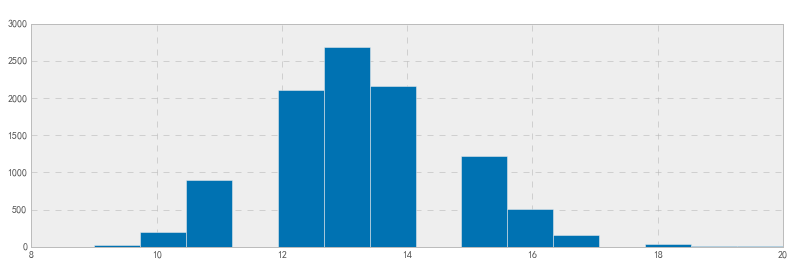

In [341]:
# 基于1w次实现的破产月份
# result_a.head()
plt.figure(figsize=(12, 4))
result_a.hist(bins = 15)
plt.title('第一回合： 不可分期——模拟结果')

